In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
from datetime import datetime
from datetime import timedelta
import glob

In [3]:
# Caminhos dos diretórios raiz                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
# general_path = 'C:/Users/cnalm/OneDrive/Hidroweb'    # Caminho do projeto (Cristiano)
# general_path = 'D:/Dados_Nuvem/OneDrive/Hidroweb'   # Colocar aqui o caminho de Filipe
general_path = 'C:/Users/linde/OneDrive/Hidroweb'   # Colocar aqui o caminho de Lindemberg

states = ['PARÁ', 'AMAPÁ', 'RORAIMA', 'AMAZONAS', 'MARANHÃO', 'CEARÁ', 'PIAUÍ', 'PERNAMBUCO', 
          'RIO GRANDE DO NORTE', 'TOCANTINS', 'PARAÍBA', 'ACRE', 'ALAGOAS', 'BAHIA', 'MATO GROSSO',
          'RONDÔNIA', 'SERGIPE', 'GOIÁS', 'MINAS GERAIS', 'DISTRITO FEDERAL', 'MATO GROSSO DO SUL',
          'ESPÍRITO SANTO', 'SÃO PAULO', 'RIO DE JANEIRO', 'PARANÁ', 'SANTA CATARINA', 'RIO GRANDE DO SUL']

In [4]:
all_files = glob.glob(general_path + '/Quality/Monthly/*.h5')
# print(all_files)
count = 0
df = []
for filename in all_files:
    df = pd.read_hdf(filename)
    df.reset_index(inplace=True, drop = True)
    # print(df)
    if count == 0:
        df_total = df.copy(deep = True)
    else:
        df_total = df_total.merge(df, how = 'left', on  = ['Code', 'Date', 'State'])
    del df
    count = count + 1
    print("File", count,"|", filename)
print(count, "files are loaded")
print(df_total.tail(3))

File 1 | C:/Users/linde/OneDrive/Hidroweb/Quality/Monthly\BRASIL_P_by_month.h5
File 2 | C:/Users/linde/OneDrive/Hidroweb/Quality/Monthly\BRASIL_Q1_by_month.h5
File 3 | C:/Users/linde/OneDrive/Hidroweb/Quality/Monthly\BRASIL_Q2_by_month.h5
File 4 | C:/Users/linde/OneDrive/Hidroweb/Quality/Monthly\BRASIL_Q3_by_month.h5
File 5 | C:/Users/linde/OneDrive/Hidroweb/Quality/Monthly\BRASIL_Q4_by_month.h5
5 files are loaded
             Code       Date  Availability      State        Gaps     Weekday  \
4266861  01348002 1999-03-01     67.741935  TOCANTINS    3.225806   59.175171   
4266862  01348002 1999-04-01    100.000000  TOCANTINS  100.000000  100.000000   
4266863  01348002 1999-05-01    100.000000  TOCANTINS  100.000000  100.000000   

         Outlier q4_repetition  
4266861    100.0           100  
4266862    100.0           100  
4266863    100.0           100  


In [5]:
df_total = df_total[['Code', 'Date','State','Availability','Gaps','Weekday','Outlier','q4_repetition']]
df_total['Quality Index'] = df_total[['Availability', 'Gaps', 'Weekday', 'q4_repetition']].mean(axis=1)
df_total

,Code,Date,State,Availability,Gaps,Weekday,Outlier,q4_repetition,Quality Index
0,00771001,1982-07-01,ACRE,100.000000,100.000000,55.278640,100.000000,100,88.81966
1,00771001,1982-08-01,ACRE,100.000000,100.000000,38.032266,100.000000,100,84.508067
2,00771001,1982-09-01,ACRE,100.000000,100.000000,54.621904,100.000000,100,88.655476
3,00771001,1982-10-01,ACRE,100.000000,100.000000,65.007289,96.774194,100,91.251822
4,00771001,1982-11-01,ACRE,100.000000,100.000000,57.836298,100.000000,100,89.459074
...,...,...,...,...,...,...,...,...,...
4266859,01348002,1999-01-01,TOCANTINS,100.000000,100.000000,55.904145,96.774194,100,88.976036
4266860,01348002,1999-02-01,TOCANTINS,100.000000,100.000000,53.310271,100.000000,100,88.327568
4266861,01348002,1999-03-01,TOCANTINS,67.741935,3.225806,59.175171,100.000000,100,57.535728
4266862,01348002,1999-04-01,TOCANTINS,100.000000,100.000000,100.000000,100.000000,100,100.0


In [6]:
def calculate_quality_label(row):
    if row['Quality Index'] >= 90 and row['Availability'] >= 99:
        return 'Excellent Quality'
    elif row['Quality Index'] >= 85 and row['Availability'] >= 95:
        return 'Good Quality'
    elif row['Quality Index'] >= 80 and row['Availability'] >= 90:
        return 'Acceptable Quality'
    elif row['Quality Index'] >= 50:
        return 'Low Quality'
    else:
        return 'Very Low Quality'  # You can change this label based on your requirements

In [7]:
# Apply the function to create the 'Quality Label' column
df_total['Quality Label'] = df_total.apply(calculate_quality_label, axis=1)

# Display the updated DataFrame with the new 'Quality Label' column
df_total

,Code,Date,State,Availability,Gaps,Weekday,Outlier,q4_repetition,Quality Index,Quality Label
0,00771001,1982-07-01,ACRE,100.000000,100.000000,55.278640,100.000000,100,88.81966,Good Quality
1,00771001,1982-08-01,ACRE,100.000000,100.000000,38.032266,100.000000,100,84.508067,Acceptable Quality
2,00771001,1982-09-01,ACRE,100.000000,100.000000,54.621904,100.000000,100,88.655476,Good Quality
3,00771001,1982-10-01,ACRE,100.000000,100.000000,65.007289,96.774194,100,91.251822,Excellent Quality
4,00771001,1982-11-01,ACRE,100.000000,100.000000,57.836298,100.000000,100,89.459074,Good Quality
...,...,...,...,...,...,...,...,...,...,...
4266859,01348002,1999-01-01,TOCANTINS,100.000000,100.000000,55.904145,96.774194,100,88.976036,Good Quality
4266860,01348002,1999-02-01,TOCANTINS,100.000000,100.000000,53.310271,100.000000,100,88.327568,Good Quality
4266861,01348002,1999-03-01,TOCANTINS,67.741935,3.225806,59.175171,100.000000,100,57.535728,Low Quality
4266862,01348002,1999-04-01,TOCANTINS,100.000000,100.000000,100.000000,100.000000,100,100.0,Excellent Quality


In [8]:
df_total.to_hdf(general_path + '/Quality/BRASIL_Q_QUALITY_INDEX_by_month.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")
df_total.tail(3)

C:\Users\linde\AppData\Local\Temp\ipykernel_12780\3303322532.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df_total.to_hdf(general_path + '/Quality/BRASIL_Q_QUALITY_INDEX_by_month.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")
C:\Users\linde\AppData\Local\Temp\ipykernel_12780\3303322532.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->Index(['Code', 'State', 'q4_repetition', 'Quality Index', 'Quality Label'], dtype='object')]

  df_total.to_hdf(general_path + '/Quality/BRASIL_Q_QUALITY_INDEX_by_month.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")


,Code,Date,State,Availability,Gaps,Weekday,Outlier,q4_repetition,Quality Index,Quality Label
4266861,01348002,1999-03-01,TOCANTINS,67.741935,3.225806,59.175171,100.0,100,57.535728,Low Quality
4266862,01348002,1999-04-01,TOCANTINS,100.000000,100.000000,100.000000,100.0,100,100.0,Excellent Quality
4266863,01348002,1999-05-01,TOCANTINS,100.000000,100.000000,100.000000,100.0,100,100.0,Excellent Quality


In [9]:
quality_counts = df_total['Quality Label'].value_counts()

# Display the count of rows by quality label
print(quality_counts)

Quality Label
Excellent Quality     2899903
Good Quality          1007817
Low Quality            193333
Acceptable Quality     162393
Very Low Quality         3418
Name: count, dtype: int64


In [10]:
# Calculate percentage by dividing each count by the total count and multiplying by 100
quality_percentage = (quality_counts / len(df_total)) * 100

# Display the percentage count by quality label
print(quality_percentage)

Quality Label
Excellent Quality     67.963333
Good Quality          23.619619
Low Quality            4.531033
Acceptable Quality     3.805910
Very Low Quality       0.080106
Name: count, dtype: float64


In [11]:
averages_by_quality = df_total.groupby('Quality Label').agg({
    'Availability': 'mean',
    'Gaps': 'mean',
    'Weekday': 'mean',
    'q4_repetition': 'mean',
    'Quality Index': 'mean'
})

# Sort the results by average 'Availability' in descending order
averages_by_quality = averages_by_quality.sort_values(by='Quality Index', ascending=False)

# Display the averages grouped by quality label ordered by higher availability
print(averages_by_quality)

                    Availability        Gaps    Weekday q4_repetition  \
Quality Label                                                           
Excellent Quality     100.000000  100.000000  82.563498         100.0   
Good Quality           99.934352   99.816677  52.723734         100.0   
Acceptable Quality     99.257296   98.048295  37.841267         100.0   
Low Quality            86.229166   82.470366  67.856317     32.107814   
Very Low Quality       39.851952    5.676055  56.397341     72.293739   

                   Quality Index  
Quality Label                     
Excellent Quality      95.640875  
Good Quality           88.118691  
Acceptable Quality     83.786714  
Low Quality            67.165916  
Very Low Quality       43.554772  


In [12]:

# Calculate the minimum values of columns grouped by 'Quality Label'
min_values_by_quality = df_total.groupby('Quality Label').agg({
    'Availability': 'min',
    'Gaps': 'min',
    'Weekday': 'min',
    'q4_repetition': 'min',
    'Quality Index': 'min'
})
min_values_by_quality = min_values_by_quality.sort_values(by='Quality Index', ascending=False)
# Display the minimum values grouped by quality label
print(min_values_by_quality)

                    Availability        Gaps    Weekday q4_repetition  \
Quality Label                                                           
Excellent Quality     100.000000  100.000000  60.000000           100   
Good Quality           96.428571   89.285714  40.371521           100   
Acceptable Quality     90.000000   70.000000  20.627461           100   
Low Quality             3.225806    0.000000   0.000000             0   
Very Low Quality        6.451613    0.000000   0.000000             0   

                   Quality Index  
Quality Label                     
Excellent Quality           90.0  
Good Quality           85.003821  
Acceptable Quality          80.0  
Low Quality                 50.0  
Very Low Quality       15.833333  


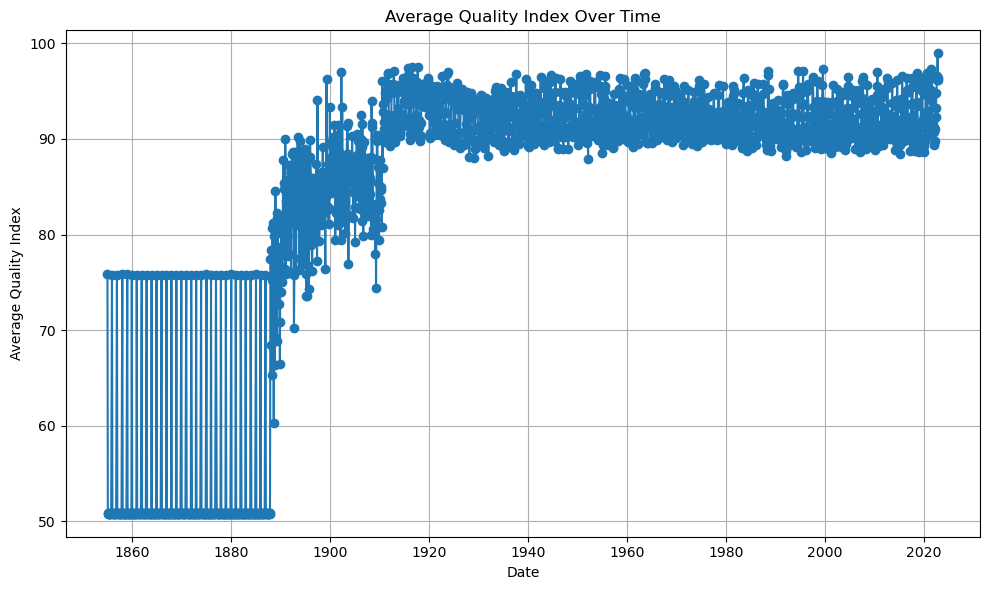

In [13]:
# Convert 'Date' column to datetime format if it's not already in datetime
df_total['Date'] = pd.to_datetime(df_total['Date'])

# Group by 'Date' and calculate the average quality index
avg_quality_over_time = df_total.groupby('Date')['Quality Index'].mean()

# Create a line plot for average quality index over time
plt.figure(figsize=(10, 6))
plt.plot(avg_quality_over_time.index, avg_quality_over_time.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Quality Index')
plt.title('Average Quality Index Over Time')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

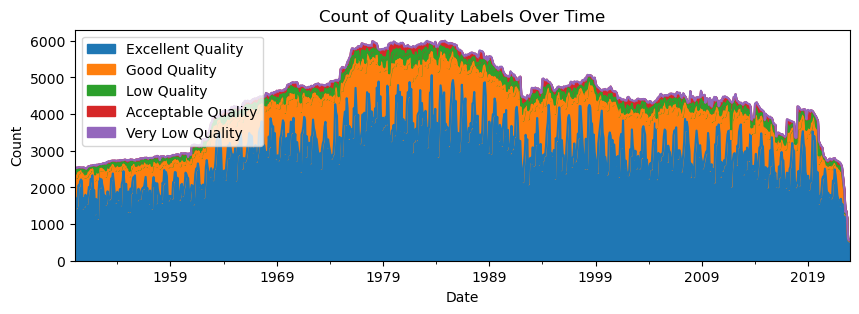

In [14]:
# Assuming df_total is your DataFrame containing 'Date', 'Quality Label', and 'Availability' columns

# Convert 'Date' column to datetime format if it's not already in datetime
df_total['Date'] = pd.to_datetime(df_total['Date'])

filtered_data = df_total[df_total['Date'].dt.year >= 1950]

# Group by 'Date' and 'Quality Label' and count occurrences
quality_counts_over_time = filtered_data.groupby(['Date', 'Quality Label']).size().unstack(fill_value=0)

# Calculate the total availability for each date
total_availability = filtered_data.groupby('Date')['Availability'].sum()

# Get the sorted labels based on availability
sorted_labels = quality_counts_over_time.sum().sort_values(ascending=False).index

# Reorder columns in quality_counts_over_time based on sorted_labels
quality_counts_over_time = quality_counts_over_time[sorted_labels]

# Plotting the analysis
quality_counts_over_time.plot.area(stacked=True, figsize=(10, 3))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Quality Labels Over Time')

# Display the plot
plt.legend(loc='upper left')
# plt.tight_layout()
plt.show()

In [15]:
code_quality_counts = df_total.groupby(['Code', 'Quality Label']).size().unstack(fill_value=0)

# Calculate the total count of each code
code_counts = df_total['Code'].value_counts()

# Calculate the proportion of quality labels for each code
proportion_by_code = code_quality_counts.div(code_counts, axis=0).fillna(0)

# Calculate the mean availability and quality index for each code
mean_values_by_code = df_total.groupby('Code')[['Availability', 'Quality Index']].mean()

# Merge mean values with proportions
merged = pd.merge(proportion_by_code, mean_values_by_code, left_index=True, right_index=True)

# Sort by highest availability and quality index
sorted_codes = merged.sort_values(by=['Availability', 'Quality Index'], ascending=False)

# Display the proportion of quality labels for each code ordered by highest availability and quality index
print(sorted_codes.head(59))

          Acceptable Quality  Excellent Quality  Good Quality  Low Quality  \
Code                                                                         
00144001            0.000000           1.000000      0.000000     0.000000   
00241011            0.000000           1.000000      0.000000     0.000000   
00442017            0.000000           1.000000      0.000000     0.000000   
00541020            0.000000           1.000000      0.000000     0.000000   
00640043            0.000000           1.000000      0.000000     0.000000   
00641018            0.000000           1.000000      0.000000     0.000000   
00740046            0.000000           1.000000      0.000000     0.000000   
00740047            0.000000           1.000000      0.000000     0.000000   
00742017            0.000000           1.000000      0.000000     0.000000   
00841021            0.000000           1.000000      0.000000     0.000000   
00863007            0.000000           1.000000      0.000000   

In [16]:
# Assuming df_total is your DataFrame containing 'Code', 'Quality Label', 'Availability', and 'Quality Index' columns

# Calculate the total count of each code and quality label
code_quality_counts = df_total.groupby(['Code', 'Quality Label']).size().unstack(fill_value=0)

# Calculate the total count of each code
code_counts = df_total['Code'].value_counts()

# Calculate the proportion of quality labels for each code
proportion_by_code = code_quality_counts.div(code_counts, axis=0).fillna(0)

# Calculate the mean availability and quality index for each code
mean_values_by_code = df_total.groupby('Code')[['Availability', 'Quality Index']].mean()

# Merge mean values with proportions
merged = pd.merge(proportion_by_code, mean_values_by_code, left_index=True, right_index=True)

# Calculate the number of unique dates for each code
dates_per_code = df_total.groupby('Code')['Date'].nunique()

# Add a column for the number of dates each code has
merged['Number of Months'] = dates_per_code

# Sort by highest availability and quality index
sorted_codes = merged.sort_values(by=['Quality Index', 'Number of Months','Availability'], ascending=False)

# Display the proportion of quality labels for each code ordered by highest availability and quality index
sorted_codes.head(59)

,Acceptable Quality,Excellent Quality,Good Quality,Low Quality,Very Low Quality,Availability,Quality Index,Number of Months
Code,,,,,,,,
00241011,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,17
00863007,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12
01061004,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12
01064000,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12
01065007,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12
01161005,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12
01162002,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12
01260003,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12
01264001,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12


In [18]:
def classify_station_quality(row):
    weight = 0.5
    if row['Excellent Quality'] + row['Good Quality'] * weight >= 0.90:
        return 'Excellent Quality'
    elif row['Excellent Quality'] + row['Good Quality'] * weight >= 0.85:
        return 'Good Quality'
    elif row['Excellent Quality'] + row['Good Quality'] * weight >= 0.80:
        return 'Acceptable Quality'
    elif row['Excellent Quality'] + row['Good Quality'] * weight >= 0.50:
        return 'Low Quality'
    else:
        return 'Very Low Quality'

# Apply the function to create the 'Station Quality' column
sorted_codes['Station Quality'] = sorted_codes.apply(classify_station_quality, axis=1)

# Display the classified codes by station_quality
sorted_codes.head(59)

,Acceptable Quality,Excellent Quality,Good Quality,Low Quality,Very Low Quality,Availability,Quality Index,Number of Months,Station Quality
Code,,,,,,,,,
00241011,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,17,Excellent Quality
00863007,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12,Excellent Quality
01061004,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12,Excellent Quality
01064000,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12,Excellent Quality
01065007,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12,Excellent Quality
01161005,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12,Excellent Quality
01162002,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12,Excellent Quality
01260003,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12,Excellent Quality
01264001,0.000000,1.000000,0.000000,0.000000,0.0,100.000000,100.0,12,Excellent Quality


In [19]:
sorted_codes.columns = sorted_codes.columns.droplevel(0)
sorted_codes

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [ ]:
sorted_codes.to_hdf(general_path + '/Consolidated Files/BRASIL_CEMADEN_HQ_DAILY.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")
sorted_codes

In [37]:
# Assuming sorted_codes is your DataFrame

# Group by 'Station Quality' and count the number of codes in each group
codes_by_station_quality = sorted_codes.groupby('Station Quality').size()

# Group by 'Station Quality' and calculate the mean quality index for each group
average_quality_index = sorted_codes.groupby('Station Quality')['Quality Index'].mean()

# Combine counts and average quality index into a DataFrame
summary = pd.DataFrame({'Number of Codes': codes_by_station_quality, 'Average Quality Index': average_quality_index})

# Sort the summary DataFrame by average quality index in descending order
summary = summary.sort_values(by='Average Quality Index', ascending=False)

# Display the counts of codes grouped by station quality ordered by average quality index
print(summary)

                    Number of Codes  Average Quality Index
Station Quality                                           
Excellent Quality               728              96.901171
Good Quality                   1608              95.415184
Acceptable Quality             2144              93.535516
Low Quality                    6980              90.912977
Very Low Quality                266              72.628720


In [38]:
# Assuming sorted_codes is your DataFrame

# Calculate the total count of codes
total_codes = len(sorted_codes)

# Group by 'Station Quality' and count the number of codes in each group
codes_by_station_quality = sorted_codes.groupby('Station Quality').size()

# Calculate proportions as a percentage of the total codes
proportion_percent = (codes_by_station_quality / total_codes) * 100

# Group by 'Station Quality' and calculate the mean quality index for each group
average_quality_index = sorted_codes.groupby('Station Quality')['Quality Index'].mean()

# Combine counts, average quality index, and proportions into a DataFrame
summary = pd.DataFrame({'Number of Codes': codes_by_station_quality,
                        'Proportion (%)': proportion_percent,
                        'Average Quality Index': average_quality_index})

# Sort the summary DataFrame by average quality index in descending order
summary = summary.sort_values(by='Average Quality Index', ascending=False)

# Display the counts of codes grouped by station quality ordered by average quality index as a percentage of total codes
print(summary)

                    Number of Codes  Proportion (%)  Average Quality Index
Station Quality                                                           
Excellent Quality               728        6.208426              96.901171
Good Quality                   1608       13.713116              95.415184
Acceptable Quality             2144       18.284155              93.535516
Low Quality                    6980       59.525840              90.912977
Very Low Quality                266        2.268463              72.628720
